In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%cd /Midgard/home/amirme/an_explanation_model
from source.project_manager import (
    load_experiment_metadata,
    delete_experiment_data,
    check_file_exists,
)
from source.data_manager import preprocess_masks,plot_masks,minmax_normalize,sum_channels
from source.labels import IMAGENET_LABELS
imshow_args = {"cmap": "viridis"}

/Midgard/home/amirme/an_explanation_model


In [15]:
project_metadata = load_experiment_metadata(glob_path="experiment_4/*")
print(project_metadata.columns)
project_metadata = project_metadata.set_index(
    [
        "stream_name",
        "stream_statistic",
        "image_index",
        "baseline_mask_type",
        "alpha_mask_value",
    ]
).sort_index()
print(project_metadata.shape)

Index(['method', 'alpha_mask_type', 'alpha_mask_value', 'projection_type',
       'projection_top_k', 'baseline_mask_type', 'write_demo', 'architecture',
       'max_batches', 'min_change', 'seed', 'batch_size', 'num_classes',
       'input_shape', 'image_index', 'monitored_statistic', 'monitored_stream',
       'dataset', 'output_layer', 'label', 'image_path', 'time_to_compute',
       'batch_index', 'monitored_statistic_change', 'data_path', 'stream_name',
       'stream_statistic', 'csv_file_path', 'baseline_mask_value'],
      dtype='object')
(120, 24)


In [16]:
vc = project_metadata.index.value_counts()
print(vc)
print(len(vc))

stream_name        stream_statistic  image_index  baseline_mask_type  alpha_mask_value
log_probs          meanx             3            gaussian            0.2                 1
                                                                      0.3                 1
vanilla_grad_mask  meanx2            3            static              0.5                 1
                                                                      0.4                 1
                                                                      0.3                 1
                                                                                         ..
log_probs          meanx             11           static              0.2                 1
                                                  gaussian            0.6                 1
                                                                      0.5                 1
                                                                      0.4            

['baseline_mask_type', 'alpha_mask_value']


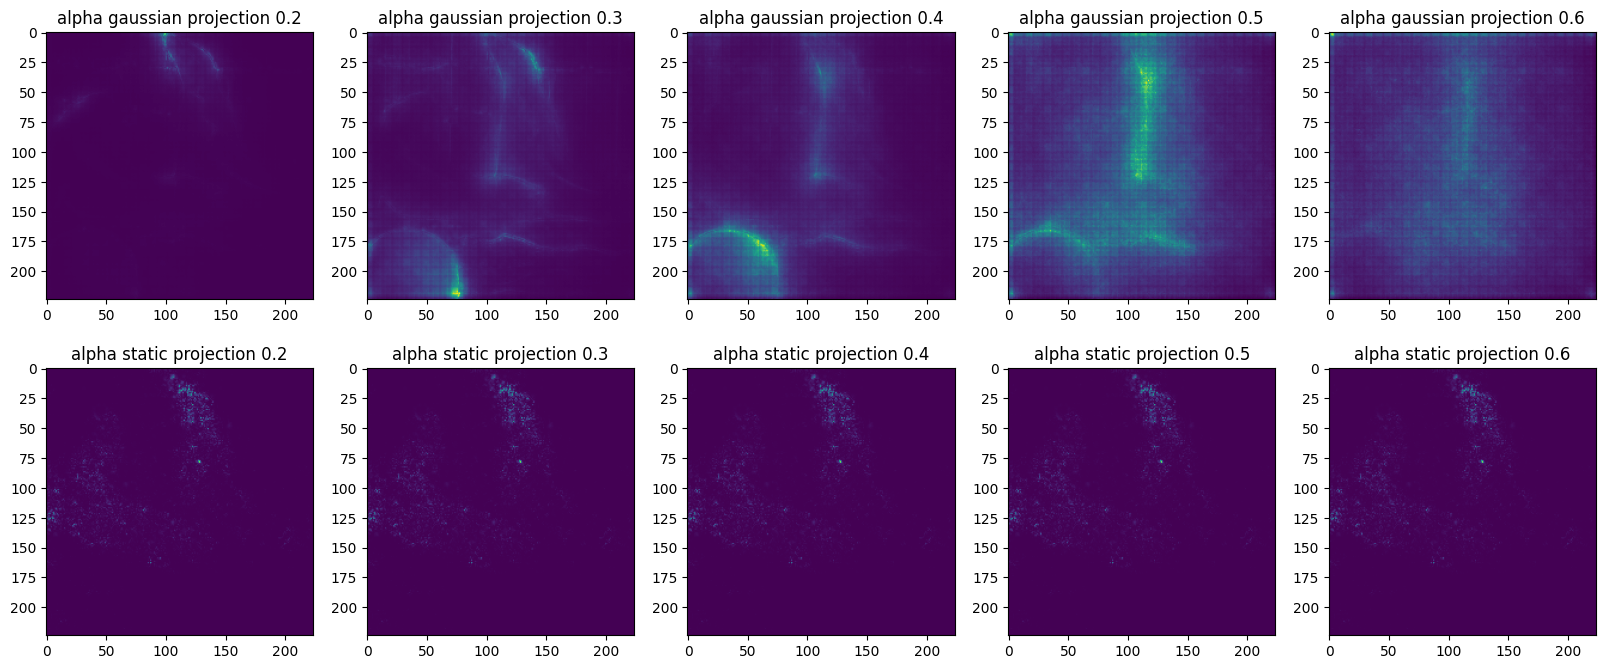

In [22]:
image_index = 5
temp_data = project_metadata.loc[
    (
        "vanilla_grad_mask",
        "meanx2",
        image_index,
    ),
    "data_path",
].apply(lambda x: np.load(x))
temp_data = preprocess_masks(temp_data, preprocesses=[minmax_normalize, sum_channels])
print(temp_data.index.names)
titles = temp_data.index.to_series().apply(lambda x: f"alpha {x[0]} projection {x[1]}")
plot_masks(temp_data, titles=titles, imshow_args=imshow_args, ncols=5)